In [1]:
import pandas as pd

In [2]:
#load the training data
train_df = pd.read_csv("C:\\Users\\IBM_ADMIN\\Desktop\\kaggle\\zillow\\data\\train_2016\\train_2016.csv")
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [3]:
train_df.shape

(90811, 3)

In [4]:
#load the properties file
properties_df = pd.read_csv("C:\\Users\\IBM_ADMIN\\Desktop\\kaggle\\zillow\\data\\properties_2016\\properties_2016.csv")
properties_df.head()

C:\Program Files\Anaconda3\envs\aind-dl\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
properties_df.shape

(2985217, 58)

In [6]:
train_merged_df = pd.merge(train_df, properties_df, how='left', on=['parcelid'])
train_merged_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [45]:
#get columns with most missing values
missing_values_df = train_merged_df.isnull().sum().to_frame().reset_index()

drop_columns = missing_values_df[missing_values_df[0] > 45000]['index'].tolist()

In [61]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [146]:
train_merged_removedColumns_df = train_merged_df.drop(drop_columns, axis=1)

In [147]:
train_merged_removedColumns_df['transactiondate'] = train_merged_removedColumns_df['transactiondate'].apply(lambda x: int(x.split('-')[1]))

In [148]:
train_merged_removedColumns_df['transactiondate']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
90781    12
90782    12
90783    12
90784    12
90785    12
90786    12
90787    12
90788    12
90789    12
90790    12
90791    12
90792    12
90793    12
90794    12
90795    12
90796    12
90797    12
90798    12
90799    12
90800    12
90801    12
90802    12
90803    12
90804    12
90805    12
90806    12
90807    12
90808    12
90809    12
90810    12
Name: transactiondate, Length: 90811, dtype: int64

In [149]:
train_merged_removedColumns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90811 entries, 0 to 90810
Data columns (total 31 columns):
parcelid                        90811 non-null int64
logerror                        90811 non-null float64
transactiondate                 90811 non-null int64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
fips                            90275 non-null float64
fullbathcnt                     89093 non-null float64
heatingorsystemtypeid           56080 non-null float64
latitude                        90275 non-null float64
longitude                       90275 non-null float64
lotsizesquarefeet               80125 non-null float64
propertycountylandusecode       90274 non-null object
propertylanduset

In [150]:
train_merged_removedColumns_df.describe()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
count,9.081100e+04,90811.000000,90811.000000,90275.000000,90275.000000,57364.000000,89093.000000,89614.000000,85596.000000,90275.000000,...,90240.000000,90275.000000,58353.000000,89519.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,8.967000e+04
mean,1.299360e+07,0.010816,5.843147,2.279474,3.031869,5.565407,2.309216,1773.185987,1745.454531,6048.870551,...,96586.131184,1.478516,1.110414,1968.532870,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,6.049151e+13
std,2.504000e+06,0.163288,2.811232,1.004271,1.156436,1.900602,0.976172,928.162393,909.941166,20.663461,...,3661.339094,2.819627,0.797235,23.763475,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.046605e+11
min,1.071174e+07,-4.605000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,6037.000000,...,95982.000000,0.000000,1.000000,1885.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.037101e+13
25%,1.156440e+07,-0.026300,4.000000,2.000000,2.000000,4.000000,2.000000,1184.000000,1172.000000,6037.000000,...,96193.000000,0.000000,1.000000,1953.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,6.037320e+13
50%,1.255372e+07,0.005000,6.000000,2.000000,3.000000,7.000000,2.000000,1540.000000,1518.000000,6037.000000,...,96393.000000,0.000000,1.000000,1970.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,6.037615e+13
75%,1.423720e+07,0.039200,8.000000,3.000000,4.000000,7.000000,3.000000,2095.000000,2056.000000,6059.000000,...,96987.000000,0.000000,1.000000,1987.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,6.059042e+13
max,1.629608e+08,4.737000,12.000000,20.000000,16.000000,12.000000,20.000000,22741.000000,20013.000000,6111.000000,...,399675.000000,18.000000,143.000000,2015.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,6.111009e+13


In [151]:
corr_matrix = train_merged_removedColumns_df.corr()

In [152]:
corr_matrix["heatingorsystemtypeid"].sort_values(ascending=False)

heatingorsystemtypeid           1.000000
fips                            0.615482
rawcensustractandblock          0.611291
censustractandblock             0.608104
roomcnt                         0.560706
parcelid                        0.443389
buildingqualitytypeid           0.415216
longitude                       0.279011
regionidcity                    0.034137
regionidzip                     0.000706
unitcnt                        -0.002405
transactiondate                -0.006269
logerror                       -0.025018
propertylandusetypeid          -0.041043
landtaxvaluedollarcnt          -0.077456
taxvaluedollarcnt              -0.128015
taxamount                      -0.129323
lotsizesquarefeet              -0.137565
bedroomcnt                     -0.188627
structuretaxvaluedollarcnt     -0.193449
calculatedfinishedsquarefeet   -0.250469
finishedsquarefeet12           -0.251112
yearbuilt                      -0.287552
bathroomcnt                    -0.324459
calculatedbathnb

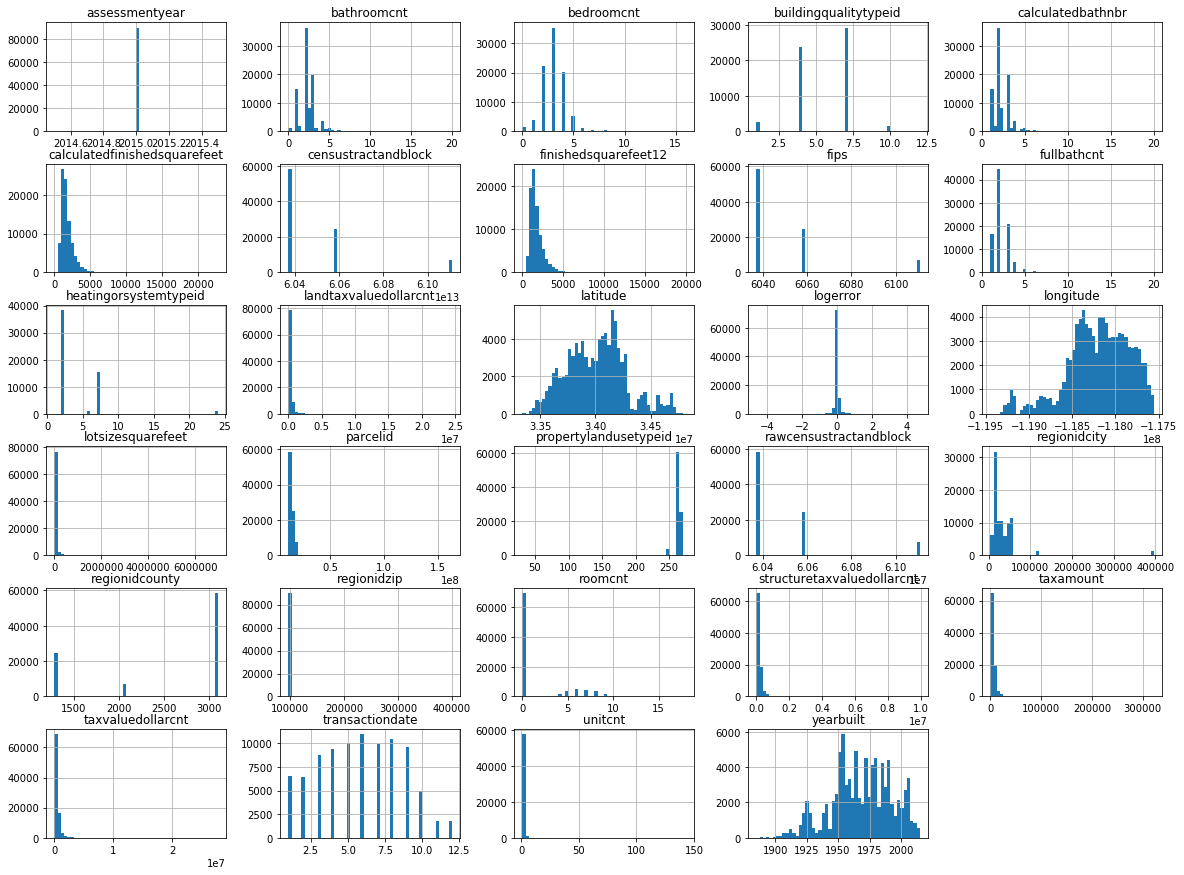

In [153]:
train_merged_removedColumns_df.hist(bins=50, figsize=(20,15))
plt.show()

In [154]:
data = train_merged_removedColumns_df.drop(['parcelid', 'logerror', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)
#transactiondate
target = train_merged_removedColumns_df['logerror'].values
print(data.shape, target.shape)

(90811, 27) (90811,)


In [155]:
data = data.apply(lambda x: x.fillna(x.median()),axis=0)

In [156]:
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [157]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(81729, 27) (81729,) (9082, 27) (9082,)


In [158]:
from sklearn.tree import DecisionTreeRegressor

regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [159]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.0290


In [81]:
#load the training data
test_df = pd.read_csv("C:\\Users\\IBM_ADMIN\\Desktop\\kaggle\\zillow\\data\\sample_submission\\sample_submission.csv")
test_df['parcelid'] = test_df['ParcelId']
test_df.head()

,ParcelId,201610,201611,201612,201710,201711,201712,parcelid
0,10754147,0,0,0,0,0,0,10754147
1,10759547,0,0,0,0,0,0,10759547
2,10843547,0,0,0,0,0,0,10843547
3,10859147,0,0,0,0,0,0,10859147
4,10879947,0,0,0,0,0,0,10879947


In [86]:
test_df.shape

(2985217, 8)

In [82]:
test_merged_df = pd.merge(test_df, properties_df, how='left', on=['parcelid'])
test_merged_df.head()

,ParcelId,201610,201611,201612,201710,201711,201712,parcelid,airconditioningtypeid,architecturalstyletypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,0,0,0,0,0,0,10754147,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,0,0,0,0,0,0,10759547,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,0,0,0,0,0,0,10843547,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,0,0,0,0,0,0,10859147,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,0,0,0,0,0,0,10879947,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [83]:
train_columns = X_test.columns

In [104]:
X_sub = test_merged_df[train_columns].apply(lambda x: x.fillna(x.mean()),axis=0)

In [105]:
X_test.shape

(9082, 26)

In [106]:
X_sub.shape

(2985217, 26)

In [107]:
 Y_sub = clf.predict(X_sub)

In [109]:
len(Y_sub)

2985217

In [110]:
sub = pd.read_csv("C:\\Users\\IBM_ADMIN\\Desktop\\kaggle\\zillow\\data\\sample_submission\\sample_submission.csv")
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = Y_sub

print('Writing csv ...')
sub.to_csv('GradientBoostingRegressor_starter.csv', index=False, float_format='%.4f')

Writing csv ...


In [161]:
feature_importances = clf.feature_importances_

In [162]:
feature_importances

array([ 0.05343218,  0.00569127,  0.01277311,  0.00304684,  0.00725639,
        0.05282204,  0.08627308,  0.0003702 ,  0.00582305,  0.00730275,
        0.06089026,  0.05519265,  0.06121974,  0.02286397,  0.01514163,
        0.03430932,  0.00112593,  0.04447543,  0.01011811,  0.00247517,
        0.04920438,  0.10940916,  0.07812079,  0.        ,  0.0909473 ,
        0.09831745,  0.03139779])

In [163]:
sorted(zip(feature_importances, train_columns), reverse=True)

[(0.10940916444158771, 'taxvaluedollarcnt'),
 (0.098317449094515577, 'censustractandblock'),
 (0.090947302268933883, 'taxamount'),
 (0.086273082654027264, 'fips'),
 (0.078120787952679446, 'assessmentyear'),
 (0.06121974414279082, 'propertylandusetypeid'),
 (0.060890256638995742, 'longitude'),
 (0.05519264649344309, 'lotsizesquarefeet'),
 (0.05343218207970301, 'bathroomcnt'),
 (0.052822042996368286, 'finishedsquarefeet12'),
 (0.049204381091221487, 'structuretaxvaluedollarcnt'),
 (0.04447542661496201, 'roomcnt'),
 (0.034309322017871097, 'regionidcounty'),
 (0.02286397421669795, 'rawcensustractandblock'),
 (0.015141630490639605, 'regionidcity'),
 (0.012773105743708622, 'buildingqualitytypeid'),
 (0.010118112805350016, 'unitcnt'),
 (0.0073027458969776287, 'latitude'),
 (0.0072563881304447617, 'calculatedfinishedsquarefeet'),
 (0.005823052337923202, 'heatingorsystemtypeid'),
 (0.0056912689453952493, 'bedroomcnt'),
 (0.0030468358068732083, 'calculatedbathnbr'),
 (0.0024751718825199698, 'year